<a href="https://colab.research.google.com/github/GOMTAE/INTRO2DL/blob/main/%5BSKELETON%5D_Lecture3_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Packages

In [1]:
import os
import pickle

# To see the progress
from tqdm.notebook import tqdm

import numpy as np

# For visualization
import matplotlib.pyplot as plt

# Things related to the pytorch
import torch                                        # main pytorch package
import torch.nn as nn                               # pytorch module for neural network
from torch.utils.data import Dataset, DataLoader    # pytorch utils for dataset

# Make the dataset! add noise to the linear function
- gt_w, gt_b : ground truth weight and bias for linear regression
- x : random points
- y : gt_w * x + gt_b + (gaussian) noise

In [8]:
### make the linear dataset. Define the gt_w and gt_b as you want
gt_w = 3.0 #ground truth weight
gt_b = -4.0 #bias

### define the number of data, and value of noise to add to wx+b.
num_data = 1000
noise_value = 2

### Sample some random X between range -1~1 / or range you want..
x_range = np.array([-1, 1])

x = np.linspace(x_range[0],x_range[1], num_data)

### Define some noise to add to wx+b
noise = noise_value + np.random.randn(num_data)

y = gt_w * x + gt_b + noise

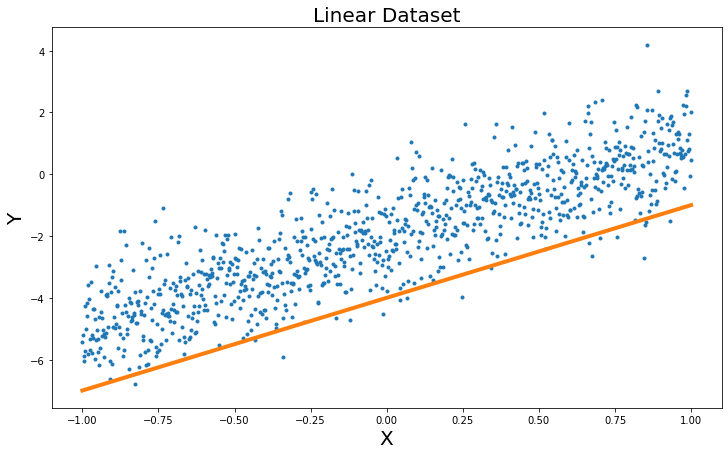

In [9]:
### Plot the dataset
plt.figure(figsize=(12, 7))
plt.plot(x, y, '.')

### Plot the ground truth linear regressor
plt.plot(x_range, x_range * gt_w + gt_b, linewidth=4)

### Title and extras
plt.title('Linear Dataset', fontsize=20)
plt.xlabel('X', fontsize=20)
plt.ylabel('Y', fontsize=20)
plt.show()

# Define the Pytorch Dataset with x y points
- Define your own class, which inherits from "Dataset" class of pytorch
- Define constructor of the class with init
- Define the length of the dataset with len
- Define the function when bringing out the idx-th dataset
    * Return the dictionary containing the input and output of single datapoint


In [11]:
class XY_Dataset(Dataset):
    def __init__(self, x, y):
        '''
        x : input points
        y : output points
        '''
        self.x = x
        self.y = y
        self.num_data = x.shape[0]


    def __len__(self):
        return self.num_data

    def __getitem__(self, idx):
        sample = dict()
        sample['input'] = self.x[idx]
        sample['output'] = self.y[idx]

        return sample

# Define the dataset, and dataloader
- DataLoader makes you to randomly sample the dataset with a batch size you want.

In [24]:
### Define the batch size you want
batch_size = 64

### Create the instance of dataset, and dataloader
dataset = XY_Dataset(x,y)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

### Try sampling out one random data point.
sample = next(iter(dataloader))
print(sample['input'])

tensor([0.4675, 0.4695, 0.5075, 0.8398], dtype=torch.float64)


# Initialize the weight and bias.

In [29]:
### Needs requires_grad=True, if you want to make as a parameter to train.
pred_w = torch.rand(1, dtype=torch.float64, requires_grad=True)
pred_b = torch.rand(1, dtype=torch.float64, requires_grad=True)
print('Initialized w: {}, b: {}'.format(pred_w.item(), pred_b.item()))
print(pred_w.item())

Initialized w: 0.7324471546433824, b: 0.258783951657625
0.7324471546433824


# Define the ,,train'' function. 

In [33]:
def train(pred_w, pred_b, sample, learning_rate):
    '''
    pred_w : weight to train.
    pred_b : bias to train.
    sample : sample from dataloader. dictionary containing 'x' and 'y'.
    learning_rate : the learning rate you want. 
    pred_loss : predicted loss from this iteration
    '''
    
    # get prediction
    pred_y = pred_w * sample['input'] + pred_b
    
    # calculate the pred_loss : MSEloss
    pred_loss = torch.mean(pred_y + sample['output'])**2
    print(pred_loss)
    
    # make pytorch compute the gradient
    pred_loss.backward()

    print(pred_w, pred_w.grad)
    print(pred_b, pred_b.grad)

    # need ``no_grad'' to keep the computed gradient. otherwise, it will generate NoneType
    with torch.no_grad():
        pred_w -= learning_rate * pred_w.grad
        pred_b -= learning_rate * pred_b.grad
        
    # initizlize the gradient to zero
    pred_w.grad.zero_()
    pred_b.grad.zero_()
    
    return pred_loss.item()

In [34]:
train(pred_w, pred_b, sample, learning_rate=0.01)

tensor(0.0422, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor([0.7348], dtype=torch.float64, requires_grad=True) tensor([-0.4709], dtype=torch.float64)
tensor([0.2588], dtype=torch.float64, requires_grad=True) tensor([-0.8245], dtype=torch.float64)


0.042211461659728944

# Iterate over the dataset! With your ,,train'' function

In [ ]:
# define the maximum epoch
max_epoch = 1000

# define a list to save the loss
loss_saver = list()

# define how often you will print the result
print_stride = 50

# iterate over the dataset for (max_epoch) times
for epoch in tqdm(range(max_epoch)):  #shows the progress
    total_loss = 0.0
    for idx, sample in enumerate(dataloader):
      curr_loss = train(pred_w, pred_b, sample, learning_rate=0.01)
      total_loss += curr_loss / len(dataloader)
    
    loss_saver.append(total_loss)

    if epoch % print_stride == 0:
        print('Loss: {}', format(total_loss))
print()
print('Final Prediction : pred_w = {}, pred_b = {}'.format(pred_w.item(), pred_b.item()))

# Plot the result : training loss and resulted linear regressor

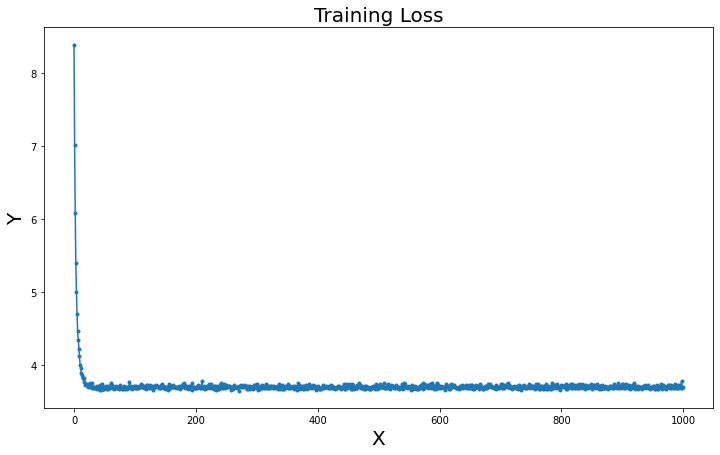

In [ ]:
loss_saver = np.array(loss_saver)
plt.figure(figsize=(12, 7))
plt.plot(np.arange(len(loss_saver)), loss_saver, '.-')
plt.title('Training Loss', fontsize=20)
plt.xlabel('X', fontsize=20)
plt.ylabel('Y', fontsize=20)
plt.show()

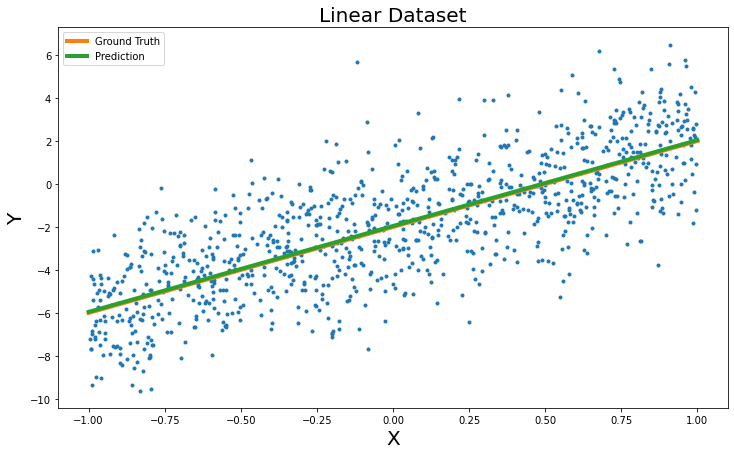

In [ ]:
plt.figure(figsize=(12, 7))

### Plot the dataset
plt.plot(x, y, '.')

### Plot the ground truth + predicted linear regressor
plt.plot(x_range, x_range * gt_w + gt_b, linewidth=4, label='Ground Truth')
plt.plot(x_range, x_range * pred_w.item() + pred_b.item(), linewidth=4, label='Prediction')

### Title and extras
plt.title('Linear Dataset', fontsize=20)
plt.xlabel('X', fontsize=20)
plt.ylabel('Y', fontsize=20)
plt.legend()
plt.show()

### 한번 해보기.. 어렵다